In [1]:
import sys
ars_path = "/home/boittier/pydcm/"
sys.path.insert(1, ars_path)
from _pydcm import *


In [21]:
# The Gaussian-format cube file containing electron density:
refDensCube="/home/boittier/test_systems/scn/scn.chk.d.cube"
# The Gaussian-format cube file containing electrostatic potential energy:
refPotCube="/home/boittier/test_systems/scn/scn.chk.p.cube"
# The root folder for your fitting project
projDir="/home/boittier/pydcm/models/scn_"
# The bin directory containing the MDCM scripts and programs
refBinDir="/home/boittier/pydcm/bin"
# The total charge of the molecule to be fitted (a.u.)
qtot=0.0
# The port to use for the local web browser (to view molecules in NGL). Make sure nobody else is using it already!
webPort='8883'
# The name of a Slurm partition allowing jobs to run for up to 2 hours with 4 cores
shortQ='short'
longQ='long'
# The desired isodensity surface to use for viewing potential energy surfaces (a.u)
isoSurf=0.01


# Number of refinement iterations for each fit. More is better, but each fit will take longer
ntry=1
# Maximum number of charges to fit per atom (minimum is fixed at 1)
maxAChg=2

natm= 4
nfrag = 1

minMChg=4
maxMChg=9

# Define fragments using atom numbering from NGL window at top of notebook
frags= [[1,2,3,4] ]
# Minimum number of charges to fit for each fragment (can average fewer than 1 per atom)
minFChg=[4]
# Maximum number of charges to fit for each fragment (upper limit per atom fixed by maxAChg)
maxFChg=[8]

workdir = projDir + '/'
refdir = workdir + 'ref/'
htmldir = workdir + 'html/'
bindir = refBinDir + '/'
pdbfile = refdir + 'mol.pdb'
densCube = refdir + os.path.basename(refDensCube)
potCube = refdir + os.path.basename(refPotCube)

In [22]:
pydcm = Pydcm(projDir, refBinDir, refDensCube, refPotCube, webPort, frags, minFChg, maxFChg, maxAChg, minMChg, maxMChg, shortQ, longQ)

In [23]:
pydcm.make_ref_directory()
pydcm.start_server()

Changed to working directory /home/boittier/pydcm/models/scn_/
4 atoms in molecule
writing PDB file /home/boittier/pydcm/models/scn_/ref/mol.pdb

Running jobs:
0 : run_http()

Web server running in directory /home/boittier/pydcm/models/scn_, URLs are relative to this pathpython /home/boittier/pydcm/bin/simple-cors-http-server.py 8883
If you change the project directory, you need to restart Jupyter-Lab to restart this server and create a new root for URLs



Traceback (most recent call last):
  File "/home/boittier/pydcm/bin/simple-cors-http-server.py", line 11, in <module>
    test(CORSRequestHandler, HTTPServer, port=int(sys.argv[1]) if len(sys.argv) > 1 else 8000)
  File "/home/boittier/miniconda3/lib/python3.8/http/server.py", line 1249, in test
    with ServerClass(addr, HandlerClass) as httpd:
  File "/home/boittier/miniconda3/lib/python3.8/socketserver.py", line 452, in __init__
    self.server_bind()
  File "/home/boittier/miniconda3/lib/python3.8/http/server.py", line 138, in server_bind
    socketserver.TCPServer.server_bind(self)
  File "/home/boittier/miniconda3/lib/python3.8/socketserver.py", line 466, in server_bind
    self.socket.bind(self.server_address)
OSError: [Errno 98] Address already in use


In [24]:
pydcm.show_ref_models()

ESP range: -7.24023 to 7.24023 a.u.
8883 /home/boittier/pydcm/models/scn_/html/ /home/boittier/pydcm/models/scn_/ref/mol.pdb
http://localhost:8883/html/refESP.html


In [25]:
pydcm.display_mtpfit_comparison()

/home/boittier/pydcm/bin/mtpfit.py


slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified



## 1Charges Per Atom:
Atom 1 final RMSE: 3.546826726 kcal/mol
Atom 2 final RMSE: 4.063704204 kcal/mol
Atom 3 final RMSE: 0.8408631676 kcal/mol
Atom 4 final RMSE: 2.563530568 kcal/mol
Atom 5 final RMSE: 0.8605051693 kcal/mol
Atom 6 final RMSE: 1.426503645 kcal/mol
Atom 7 final RMSE: 3.146419664 kcal/mol

## 2Charges Per Atom:
Atom 1 final RMSE: 0.2797244171 kcal/mol
Atom 2 final RMSE: 2.832916987 kcal/mol
Atom 3 final RMSE: 0.4933686636 kcal/mol
Atom 4 final RMSE: 0.5329713887 kcal/mol
Atom 5 final RMSE: 0.4568557142 kcal/mol
Atom 6 final RMSE: 0.8712175218 kcal/mol
Atom 7 final RMSE: 0.5260653233 kcal/mol


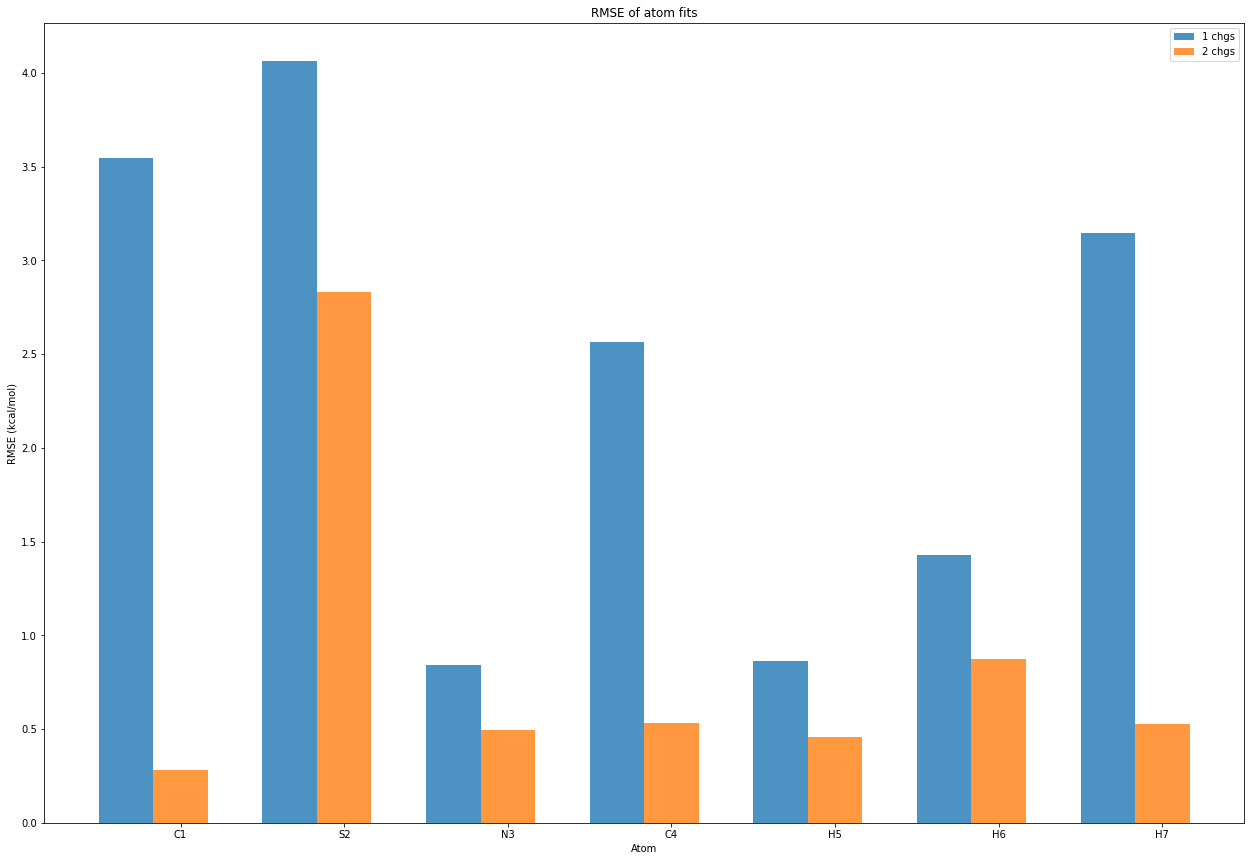

In [9]:
pydcm.do_atom_fit(maxAChg, ntry, nfrag)

In [16]:
# Number of refinement iterations for each fit. More is better, but each fit will take longer
ntry=1
# Number of separate fits to perform (restarting a fit can lead to a better outcome). Cost scales linearly
nfit=1

pydcm.fit_fragments(ntry, nfit)

submitted jobID 639523
submitted jobID 639524
submitted jobID 639525
submitted jobID 639526
submitted jobID 639527
submitted jobID 639528
submitted jobID 639529
submitted jobID 639530


False

In [14]:
pydcm.combine_fragements(ntry, nfit)

7 CHARGES:
NEW BEST 7 charges: 7 rmse = 1.290706776
8 CHARGES:
NEW BEST 8 charges: 8 rmse = 1.451952106
9 CHARGES:
NEW BEST 9 charges: 9 rmse = 1.554773811
10 CHARGES:
NEW BEST 10 charges: 10 rmse = 1.235485163
11 CHARGES:
NEW BEST 11 charges: 11 rmse = 1.471184098
12 CHARGES:
NEW BEST 12 charges: 12 rmse = 1.241072115
13 CHARGES:
NEW BEST 13 charges: 13 rmse = 1.256387502
14 CHARGES:
NEW BEST 14 charges: 14 rmse = 1.182221547


submitted jobID 639515
submitted jobID 639516
submitted jobID 639517
submitted jobID 639518
submitted jobID 639519
submitted jobID 639520
submitted jobID 639521
submitted jobID 639522

Summary of results:


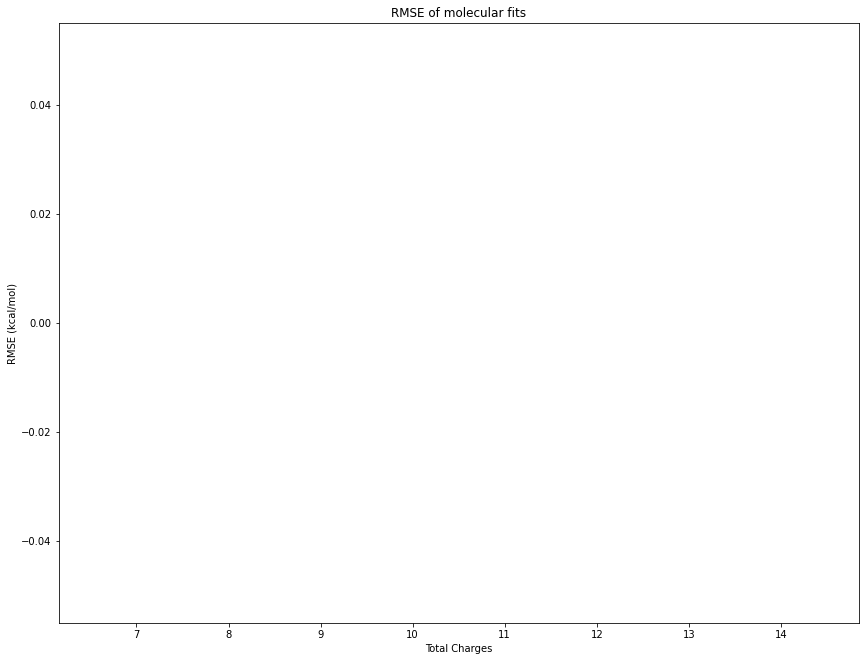

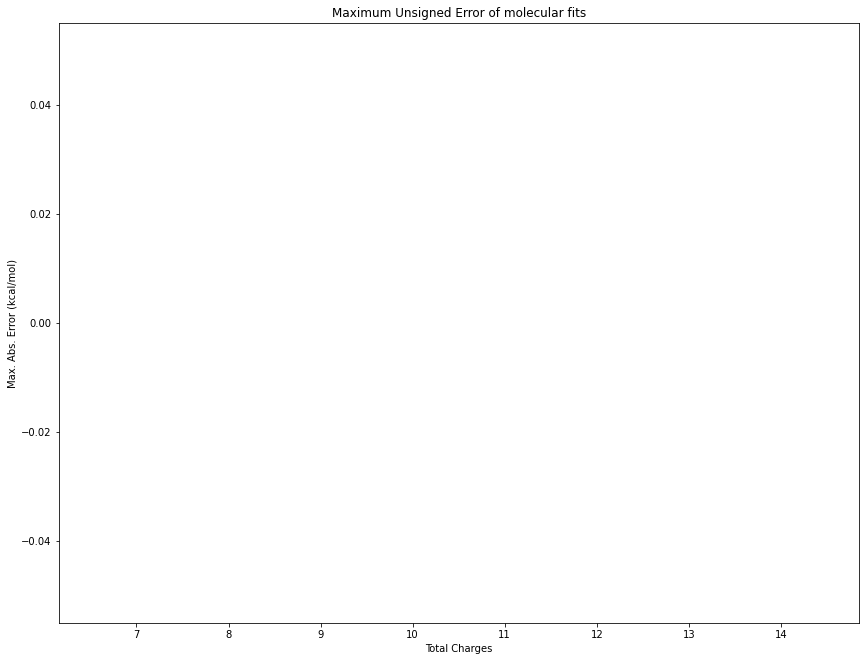

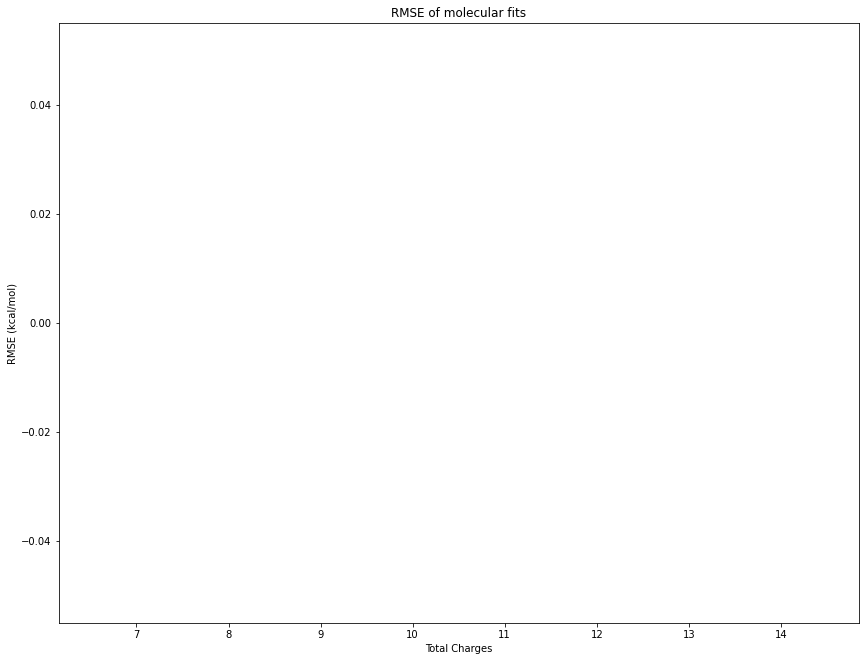

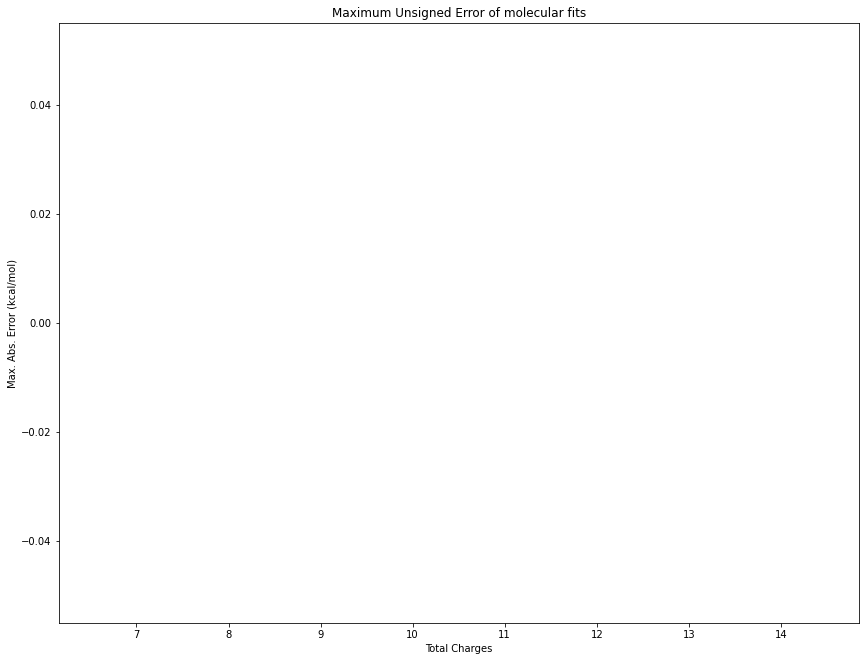

In [15]:
pydcm.refine_models()

Ditriantapole RMSE: 3.799888416E-01
0.04845684579
Monopole RMSE: 8.029232540E-01
0.206634443
satisfied
Quadrupole RMSE: 3.806049986E-01
0.04876728984
20 charge model RMSE: 4.104549475E-01
0.06484723241
[0.3799888416, 0.8100493809, 0.122851282, 0.04845684579, 0.802923254, 1.586146251, 0.5155074333, 0.206634443, 0.3806049986, 0.8112678472, 0.1233018696, 0.04876728984, 0.4104549475, 0.8621458337, 0.169165466, 0.06484723241]


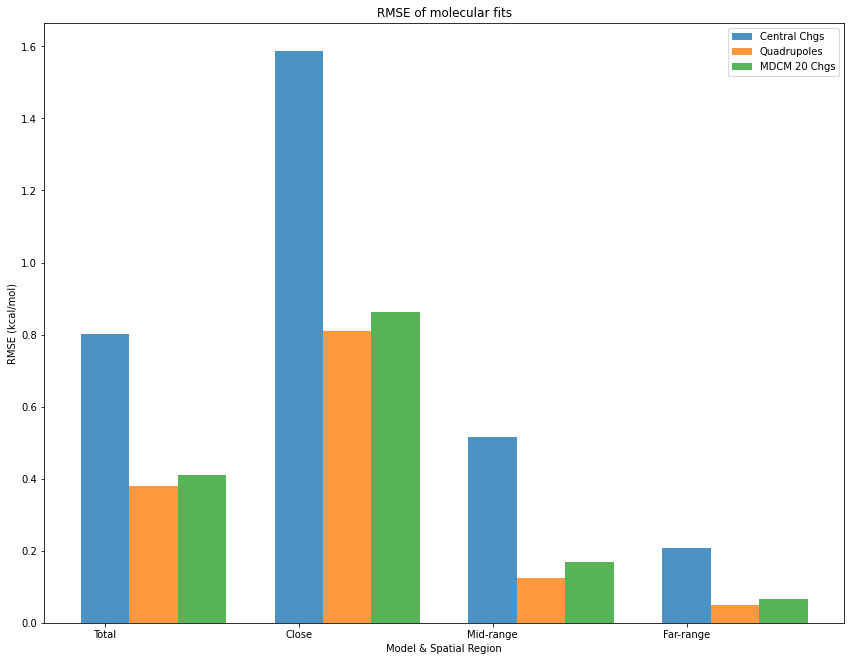

NameError: name 'densCube' is not defined

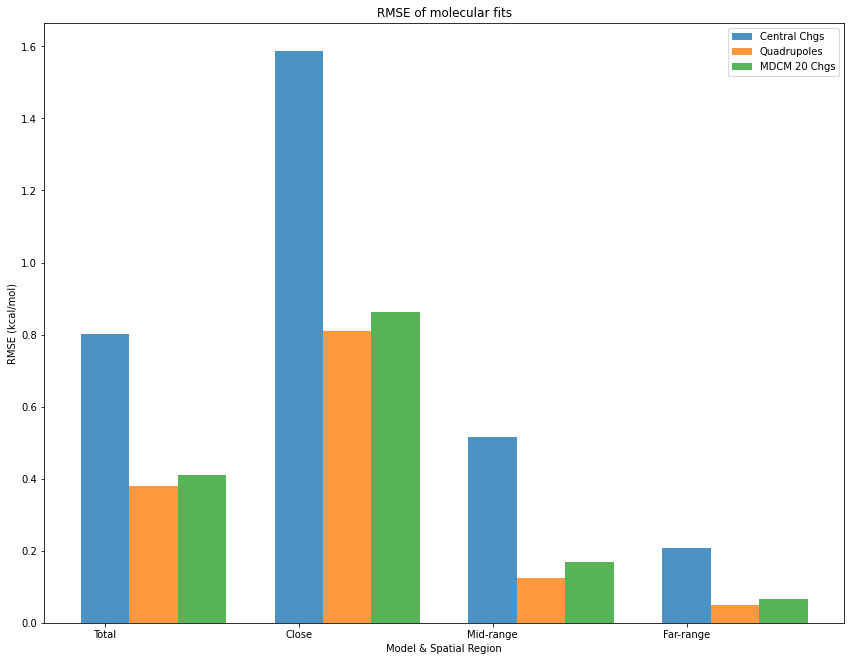

In [11]:
pydcm.analyse_model(20)

In [ ]:
pydcm.refinedir